<br>
<br>
<br>
<h1><center>Assignment 03</center></h1>
<h2><center>Exploratory Data Analysis</center></h2>
<h4><center>[ISYS2047] Information Systems Solutions and Design</center></h4>
<h3><center>Part 2. Data Cleaning</center></h3>
<br>
<div style="text-align: right"><h4>Student name: Juyeon Kim</h4></div>
<div style="text-align: right"><h4>Student ID: S3741327</h4></div>
<br></br>

## Import libraries

In [72]:
# For mathmetical process
import numpy as np

# To handle dataframe
import pandas as pd

# To replace outlier
from sklearn.impute import SimpleImputer

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# To explort cleaned data
import joblib
import os

# Data Cleaning

In [73]:
loan_df_cp = loan_df.copy()

## 1. Load and Check the missing data

> ***Result***
> - All the potential missing data was transformed into python built-in NaN. 

> ***Rows Explanation*** <br>
> 1 customer_id:  Customer identifier <br>
> 2 age: Customer age in years <br>
> 3 yrs_experience: Years of working experience of the customer <br>
> 4 family_size: Number of family members of the customer <br>
> 5 education: Education level of customer <br>
> 6 income: Income level of customer (thousand dollars per year) <br>
> 7 mortgage: Mortage amount teken by customer <br>
> 8 credit_card_acct: Does the customer have a credit account with the bank? <br>
> 9 credit_card_spend: Monthly credit card spending by customer in thousands of dollars <br>
> 10 share_trading_acct: Does the customer have a share trading account (for buying and selling shares) with the bank? [0=No, 1=Yes] <br>
> 11 fixed_deposit_acct: Does the customer have a fixed term deposit account with the bank?  [0=No, 1=Yes] <br>
> 12 online_acct: Does the customer have an online banking account? <br>
> 13 personal_loan: Did the customer take a personal loan as a result of the previous marketing campaign by the bank?  [0=No, 1=Yes] <br>

In [74]:
# all the suspecting missing values are re-encoded as "NaN"
missing_values = ['?', '--', ' ', 'NA', 'N/A', '-', ''] 
loan_df = pd.read_csv("personal-loan.csv", na_values=missing_values)

In [75]:
# Type of the dataframe
print('Type of dataframe: ',type(loan_df))
# Shape of the dataframe
print('Shape: ',loan_df.shape)
print('Number of sample: ',loan_df.shape[0])
print('Number of features: ',loan_df.shape[1])
# First 5 rows of dataframe
loan_df.head()

Type of dataframe:  <class 'pandas.core.frame.DataFrame'>
Shape:  (6000, 13)
Number of sample:  6000
Number of features:  13


,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,Graduate,60.0,0,yes,1.7,0,0,yes,no
1,5737,65.0,27.0,4.0,Advanced or Professional,36.0,90,no,0.0,0,0,yes,no
2,4209,61.0,3.0,2.0,Undergraduate,145.0,314,no,0.0,0,1,yes,yes
3,4734,29.0,14.0,1.0,Undergraduate,52.0,0,no,0.0,1,0,yes,no
4,2551,43.0,23.0,4.0,Graduate,33.0,0,no,0.0,0,0,yes,no


## 2. Fix data types

### 2.1. Data frame info

> ***Result*** <br>
> - NaN values are found <br>
> - Object datatype should be converted into numerical values<br>

In [76]:
# Print dataframe info
print(f'\t- Print dataframe info:')
loan_df.info()

	- Print dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   int64  
 1   age                 5620 non-null   float64
 2   yrs_experience      5636 non-null   float64
 3   family_size         5615 non-null   float64
 4   education_level     6000 non-null   object 
 5   income              5623 non-null   float64
 6   mortgage_amt        6000 non-null   int64  
 7   credit_card_acct    6000 non-null   object 
 8   credit_card_spend   6000 non-null   float64
 9   share_trading_acct  6000 non-null   int64  
 10  fixed_deposit_acct  6000 non-null   int64  
 11  online_acct         6000 non-null   object 
 12  personal_loan       6000 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 609.5+ KB


### 2.2. Convert "object" data type into "categorical" data

> ***Result***
> - In order to conduct descriptive analysis on each and every column, all columns in object data type have to be converted into numeric data type <br>
> - {'Graduate': 2, 'Advanced or Professional': 1, 'Undergraduate': 0} <br>
> - {'yes': 1, 'no': 0}

In [77]:
print(f'\t Printing unique values of...')
print(f'\t - education_level: {list(loan_df.education_level.unique())}')
print(f'\t - credit_card_acct: {list(loan_df.credit_card_acct.unique())}')
print(f'\t - online_accts: {list(loan_df.online_acct.unique())}')
print(f'\t - personal_loan: {list(loan_df.personal_loan.unique())}')

	 Printing unique values of...
	 - education_level: ['Graduate', 'Advanced or Professional', 'Undergraduate']
	 - credit_card_acct: ['yes', 'no']
	 - online_accts: ['yes', 'no']
	 - personal_loan: ['no', 'yes']


In [78]:
# k:v = string value of 'k' shall be converted to numeric value of 'v'.
edu_level_dict = {
    'Graduate': 2, 
    'Advanced or Professional': 1, 
    'Undergraduate': 0
}

yes_no_dict = {
    'yes': 1,
    'no': 0
}

In [79]:
# Convert all object data type into categorical data (Rename values)
loan_df["education_level"] = loan_df["education_level"].replace(edu_level_dict)
loan_df["credit_card_acct"] = loan_df["credit_card_acct"].replace(yes_no_dict)
loan_df["online_acct"] = loan_df["online_acct"].replace(yes_no_dict)
loan_df["personal_loan"] = loan_df["personal_loan"].replace(yes_no_dict)

# Preview
loan_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,2,60.0,0,1,1.7,0,0,1,0
1,5737,65.0,27.0,4.0,1,36.0,90,0,0.0,0,0,1,0
2,4209,61.0,3.0,2.0,0,145.0,314,0,0.0,0,1,1,1
3,4734,29.0,14.0,1.0,0,52.0,0,0,0.0,1,0,1,0
4,2551,43.0,23.0,4.0,2,33.0,0,0,0.0,0,0,1,0


In [80]:
# 'Object' data type successfully changed to 'int'.
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   int64  
 1   age                 5620 non-null   float64
 2   yrs_experience      5636 non-null   float64
 3   family_size         5615 non-null   float64
 4   education_level     6000 non-null   int64  
 5   income              5623 non-null   float64
 6   mortgage_amt        6000 non-null   int64  
 7   credit_card_acct    6000 non-null   int64  
 8   credit_card_spend   6000 non-null   float64
 9   share_trading_acct  6000 non-null   int64  
 10  fixed_deposit_acct  6000 non-null   int64  
 11  online_acct         6000 non-null   int64  
 12  personal_loan       6000 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 609.5 KB


## 3. Delete duplicate rows

> ***Result***
> - None of duplicates row found.

In [81]:
if len(loan_df_cp) != len(loan_df_cp.drop_duplicates()):
    loan_df_cp.drop_duplicates(inplace=True) # will keep first copy

    loan_df_cp.reset_index(drop=True, inplace=True) # reset index to default integer index

    # Check
    print(loan_df_cp.shape)
    
    print(f'\t Duplicated rows deleted successfully!')

else:
    print(f'\t No duplicate row found!')

	 No duplicate row found!


## 4. Handle missing values

> ***Result***

> - Generally, if less than 5% of values are missing then it is acceptable to ignore them (REF) <br>
> - However, we have 10% of records containing null values, and simply dropping all those records is not acceptable. <br>
> - To resolve this, we will make use of "SimpleImputer" to replace all misssing values with media values. <br>

> **Reference: https://www.google.com/search?q=dropping+10%25+of+data+missing+value&oq=dropping+10%25+of+data+missing+value&aqs=chrome..69i57j33i160j33i15i22i29i30.5667j0j1&sourceid=chrome&ie=UTF-8**<br>

### 4.1. Percentage of missing values encoded as NaN

> ***Result***
> - NaN value was found in "age", "yrs_experience", "family_size", and "income" variables.

In [82]:
# Count of missing values in the whole dataframe by column
loan_df_cp.isnull().sum()

customer_id             0
age                   380
yrs_experience        364
family_size           385
education_level         0
income                377
mortgage_amt            0
credit_card_acct        0
credit_card_spend       0
share_trading_acct      0
fixed_deposit_acct      0
online_acct             0
personal_loan           0
dtype: int64

### 4.2. Replace all missing values (NaN) with median values


In [83]:
# Replace NaN with median value in all columns
columns = loan_df_cp.columns.to_list()
columns.remove('personal_loan') # remove an outcome variable

# If you want to use SKlearn's SimpleInputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

for col in columns:
    print(col)
    # Using SimpleImputer to replace all missing values in column with median value
    loan_df_cp[col] = imp_median.fit_transform(loan_df_cp[col].values.reshape(-1, 1))
    # You can also use pandas to do the replacement (also called imputation)
    loan_df_cp[col].fillna(loan_df_cp[col].median(), inplace=True)

# Check - there should be zero percent missing values in all columns
print(round(loan_df_cp.isna().mean() * 100, 4))

customer_id
age
yrs_experience
family_size
education_level
income
mortgage_amt
credit_card_acct
credit_card_spend
share_trading_acct
fixed_deposit_acct
online_acct
customer_id           0.0
age                   0.0
yrs_experience        0.0
family_size           0.0
education_level       0.0
income                0.0
mortgage_amt          0.0
credit_card_acct      0.0
credit_card_spend     0.0
share_trading_acct    0.0
fixed_deposit_acct    0.0
online_acct           0.0
personal_loan         0.0
dtype: float64


### 4.3. Handle outliers

> ***Note***
> - Outliers only apply to continuous numerical values - not to strings or numerical categories!

#### 4.3.1. Visualising outliers

> ***Result***
> - The output shows the presence of outliers in all continuous variables. 

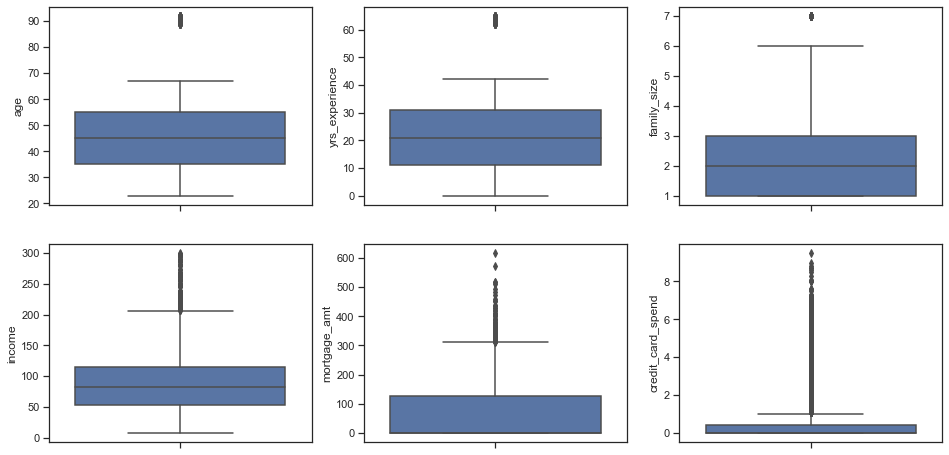

In [84]:
fig, ax = plt.subplots(2,3, figsize=(16,8))  # 2 rows and 4 columns

# Row 0
ax1 = sns.boxplot(y=loan_df_cp["age"], ax=ax[0,0]) # row 0, col 0
ax2 = sns.boxplot(y=loan_df_cp["yrs_experience"], ax=ax[0,1]) 
ax3 = sns.boxplot(y=loan_df_cp["family_size"], ax=ax[0,2])

# Row 1
ax5 = sns.boxplot(y=loan_df_cp["income"], ax=ax[1,0])
ax6 = sns.boxplot(y=loan_df_cp["mortgage_amt"], ax=ax[1,1])
ax7 = sns.boxplot(y=loan_df_cp["credit_card_spend"], ax=ax[1,2])

#### 4.3.2. Percentage outliers

> ***Result***
> - This part is to determine the extent of outliers.
> - The standard deviation can be used to identify outliers, if the variable is normally distributed. 
> - credit_card_spend has the greatest percentage of outliers of 18.15%. 
> - family_size has the smallest percentage of outliers of: 0.57%.

In [32]:
# Finding the percentages of outlier per columns

# Only continuous numerical columns
columns = ["age", "yrs_experience", "family_size", "income", "mortgage_amt", "credit_card_spend"]
print()

for col in columns:
    percentile_25 = loan_df_cp[col].quantile(0.25)
    percentile_75 = loan_df_cp[col].quantile(0.75)
    iqr = percentile_75 - percentile_25 # Inter Quartile Range
    total = len(loan_df_cp[col])

    # Determine the upper and lower boundaries for outliers
    # The lower and upper boundaries are less than the bottom whisker or greater than the top whisker
    #cut_off = iqr * 3    # three times IQR - for detecting extreme outliers
    cut_off = iqr * 1.5  # normally use 1.5 times IQR
    lower, upper = percentile_25 - cut_off, percentile_75 + cut_off
    print(f"col: {col}, lower: {lower}, upper: {upper}")

    # Count all values that are less than the lower boundary OR those that are greater than the upper boundary
    #num_outliers = diabetes_df[(diabetes_df[col] < lower) | (diabetes_df[col] > upper)].count() 
    # returns a list of things
    num_outliers = len(loan_df_cp[(loan_df_cp[col] < lower) | (loan_df_cp[col] > upper)])
    
    pc_outliers = round(num_outliers*100/total,2)
    
    print(f"Num outliers: {num_outliers}, total rows: {total}, percent: {pc_outliers}")
    print()


col: age, lower: 5.0, upper: 85.0
Num outliers: 66, total rows: 6000, percent: 1.1

col: yrs_experience, lower: -19.0, upper: 61.0
Num outliers: 76, total rows: 6000, percent: 1.27

col: family_size, lower: -2.0, upper: 6.0
Num outliers: 34, total rows: 6000, percent: 0.57

col: income, lower: -37.5, upper: 206.5
Num outliers: 99, total rows: 6000, percent: 1.65

col: mortgage_amt, lower: -187.5, upper: 312.5
Num outliers: 79, total rows: 6000, percent: 1.32

col: credit_card_spend, lower: -0.6000000000000001, upper: 1.0
Num outliers: 1089, total rows: 6000, percent: 18.15



#### 4.3.3. Replace outliers with median

> ***Result***
> - How to handle outliers? one of the strategies is to replace outliers with the median value.
> - For the "yrs_experience", "family_size", "income", "mortgage_amt" columns, the lower cut off points are -17.5, -2.0, -31.5, -180.0 respectively, and there are no such values in the column!
> - Any values greater than the upper cut off point were changed to median value. 

In [85]:
# Using Inter Quartile Range (IQR) to detect outliers - for non-normal (non-Gaussian) distributions

# Only continuous numerical columns
columns = ["age", "yrs_experience", "family_size", "income", "mortgage_amt", "credit_card_spend"]
print()

for col in columns:
    median_val = loan_df_cp[col].quantile(0.50)
    percentile_25 = loan_df_cp[col].quantile(0.25)
    percentile_75 = loan_df_cp[col].quantile(0.75)
    iqr = percentile_75 - percentile_25 # Inter Quartile Range
    
    # Determine the upper and lower boundaries for outliers
    # The lower and upper boundaries are less than the bottom whisker or greater than the top whisker
    #cut_off = iqr * 3    # three times IQR - for detecting extreme outliers
    cut_off = iqr * 1.5  # normally use 1.5 times IQR
    lower, upper = percentile_25 - cut_off, percentile_75 + cut_off
    print(f"col: {col}, lower: {lower}, upper: {upper},  median_val: {median_val}")
    
    # Replace all outliers in column with median value
    # Replace all values that are less than the lower boundary OR those that are greater than the upper boundary
    loan_df_cp[col] = np.where((loan_df_cp[col] < lower) | (loan_df_cp[col] > upper), median_val, loan_df_cp[col])
 
# loan_df_cp.describe()
loan_df_cp.describe().T  # T means transpose - will transpose rows to column


col: age, lower: 5.0, upper: 85.0,  median_val: 45.0
col: yrs_experience, lower: -19.0, upper: 61.0,  median_val: 21.0
col: family_size, lower: -2.0, upper: 6.0,  median_val: 2.0
col: income, lower: -37.5, upper: 206.5,  median_val: 82.0
col: mortgage_amt, lower: -187.5, upper: 312.5,  median_val: 0.0
col: credit_card_spend, lower: -0.6000000000000001, upper: 1.0,  median_val: 0.0


,count,mean,std,min,25%,50%,75%,max
customer_id,6000.0,3027.886667,1723.488432,3.0,1553.75,3045.5,4511.0,6000.0
age,6000.0,45.019500,12.036400,23.0,35.00,45.0,55.0,67.0
yrs_experience,6000.0,20.632000,11.907387,0.0,11.00,21.0,30.0,42.0
family_size,6000.0,2.410167,1.130697,1.0,1.00,2.0,3.0,6.0
education_level,6000.0,0.878667,0.826070,0.0,0.00,1.0,2.0,2.0
income,6000.0,85.143500,42.705751,8.0,54.00,82.0,111.0,206.0
mortgage_amt,6000.0,62.565500,80.372850,0.0,0.00,0.0,120.0,312.0
credit_card_acct,6000.0,0.297167,0.457049,0.0,0.00,0.0,1.0,1.0
credit_card_spend,6000.0,0.055100,0.182409,0.0,0.00,0.0,0.0,1.0
share_trading_acct,6000.0,0.099167,0.298911,0.0,0.00,0.0,0.0,1.0


## 4. View cleaned data and pickle


In [86]:
loan_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   float64
 1   age                 6000 non-null   float64
 2   yrs_experience      6000 non-null   float64
 3   family_size         6000 non-null   float64
 4   education_level     6000 non-null   float64
 5   income              6000 non-null   float64
 6   mortgage_amt        6000 non-null   float64
 7   credit_card_acct    6000 non-null   float64
 8   credit_card_spend   6000 non-null   float64
 9   share_trading_acct  6000 non-null   float64
 10  fixed_deposit_acct  6000 non-null   float64
 11  online_acct         6000 non-null   float64
 12  personal_loan       6000 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 609.5 KB


In [88]:
# Dump the saved data
joblib.dump(loan_df_cp, os. getcwd() + '/' + 'loan-cleaned.pkl') 

['/Users/juyeonkim/Desktop/sem8/info_sys_solution_n_design/asgnt_03/loan-cleaned.pkl']